<a href="https://colab.research.google.com/github/hugorocha05/IrisEDA/blob/main/IrisEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Loading the Iris Dataset

In [2]:
iris = load_iris(as_frame=True)
df = iris.frame

# Add target name instead of 0, 1, 2
df["flower"] = [iris.target_names[i] for i in iris.target]
df = df.drop("target", axis=1)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Inspecting the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   flower             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Check for null/missing values
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
flower,0


In [6]:
# Check class distribution
df['flower'].value_counts()

,count
flower,
setosa,50
versicolor,50
virginica,50


# Inspecting the Classes

In [7]:
# Setosa Class
setosa_values = df["flower"] == "setosa"
setosa_df = df[setosa_values]
setosa_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [8]:
# Versicolor Class
versicolor_values = df["flower"] == "versicolor"
versicolor_df = df[versicolor_values]
versicolor_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [9]:
# Virginica Class
virginica_values = df["flower"] == "virginica"
virginica_df = df[virginica_values]
virginica_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


# Visualizing the Features

## Distributions

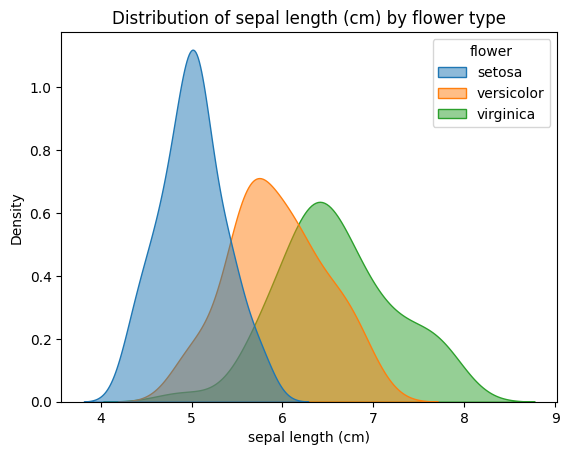

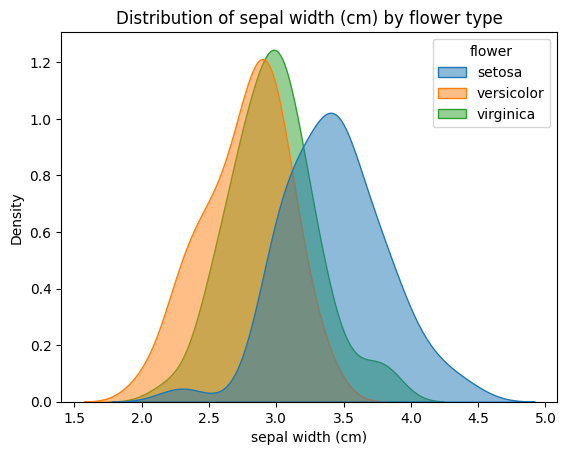

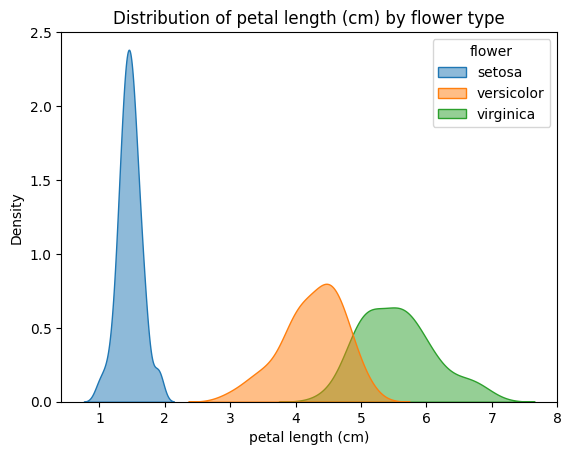

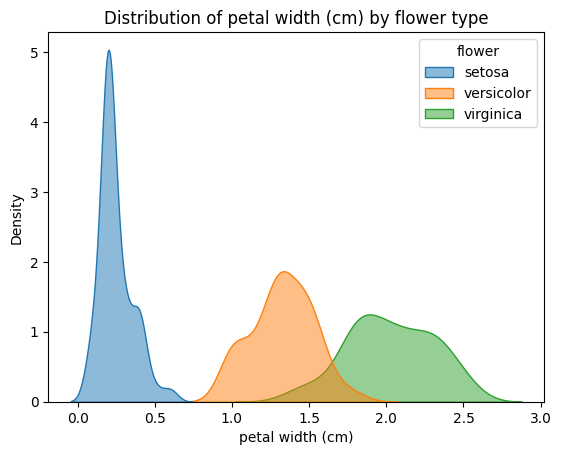

In [10]:
for feature in df.drop("flower", axis=1).columns:
  sns.kdeplot(data=df, x=feature, hue="flower", fill=True, common_norm=False, alpha=0.5)
  plt.title(f"Distribution of {feature} by flower type")
  plt.show()

## Scatterplots

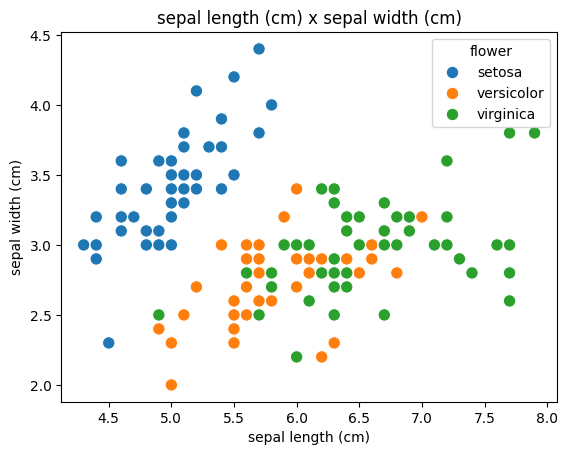

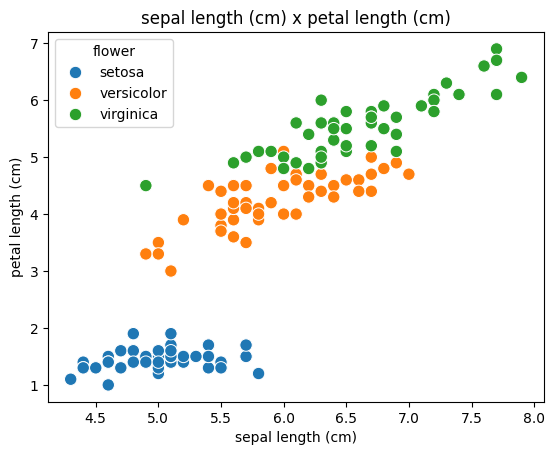

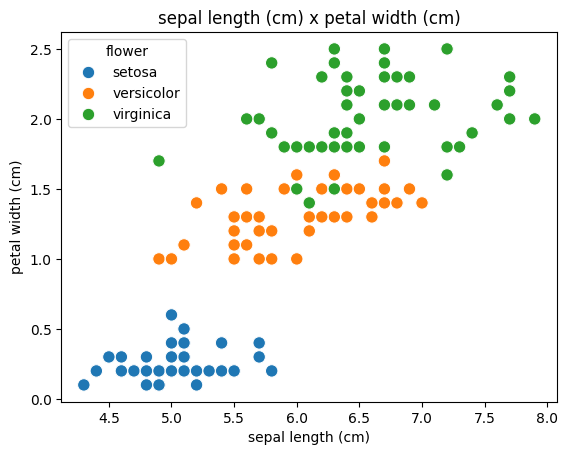

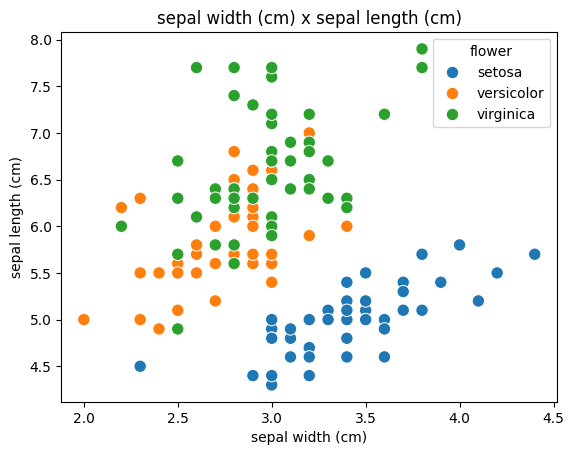

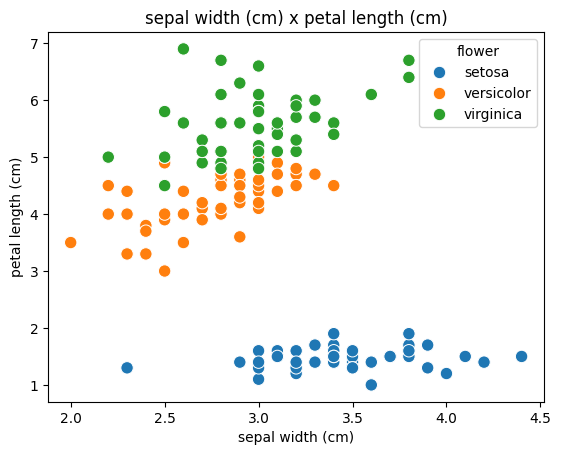

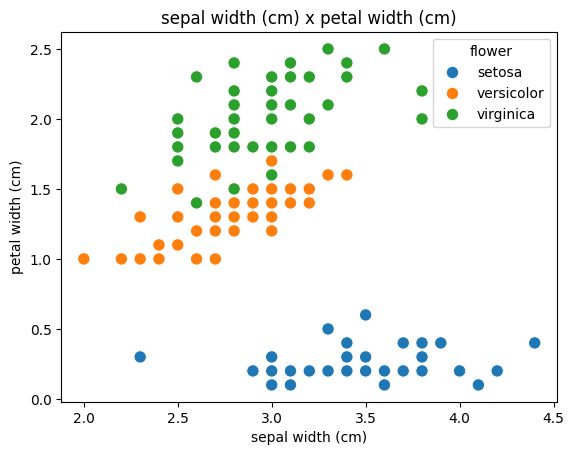

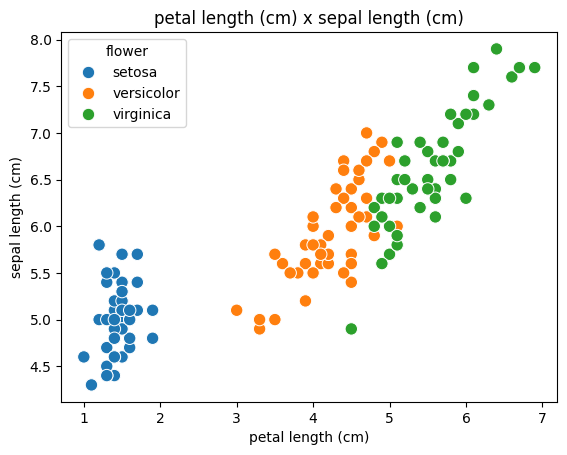

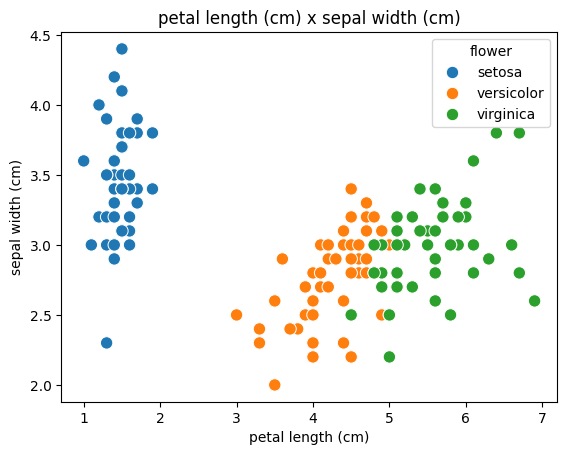

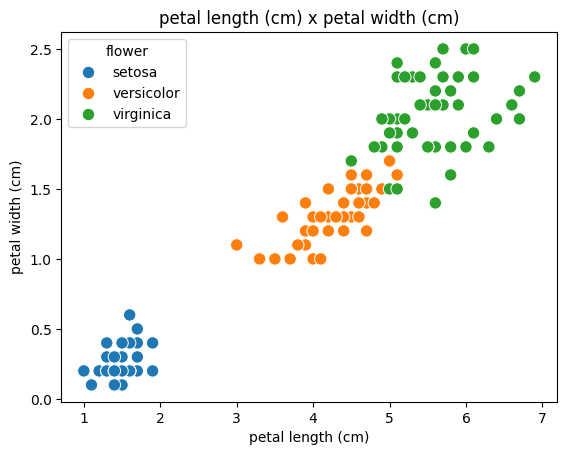

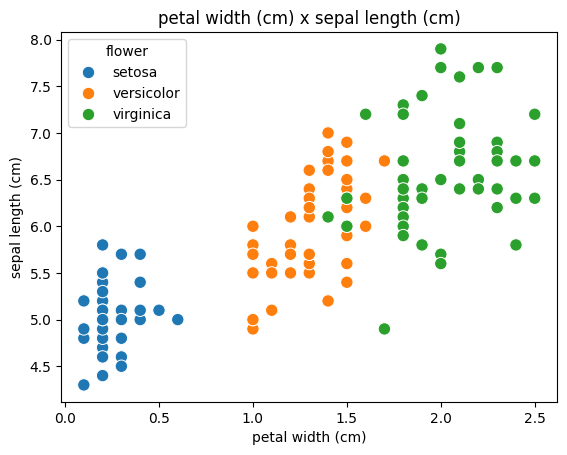

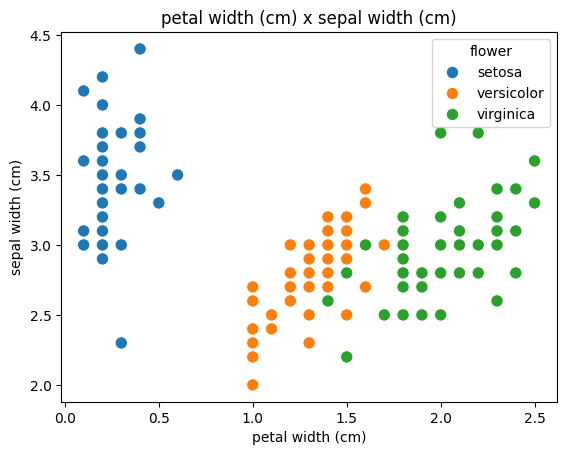

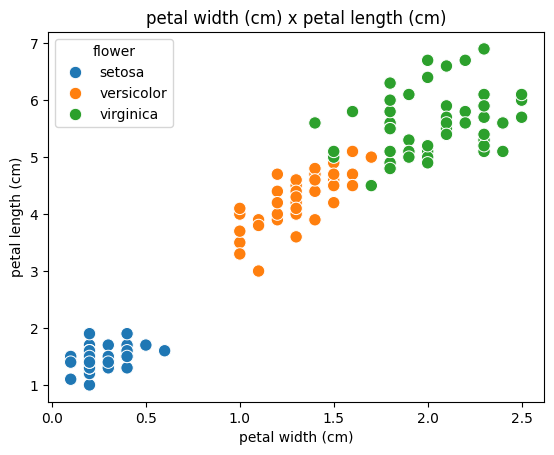

In [11]:
for x_feature in df.drop("flower", axis=1).columns:
  for y_feature in df.drop("flower", axis=1).columns:
    if x_feature != y_feature:
      sns.scatterplot(data=df, x=x_feature, y=y_feature, hue="flower", s=80)
      plt.title(f"{x_feature} x {y_feature}")
      plt.show()

## Pairplot

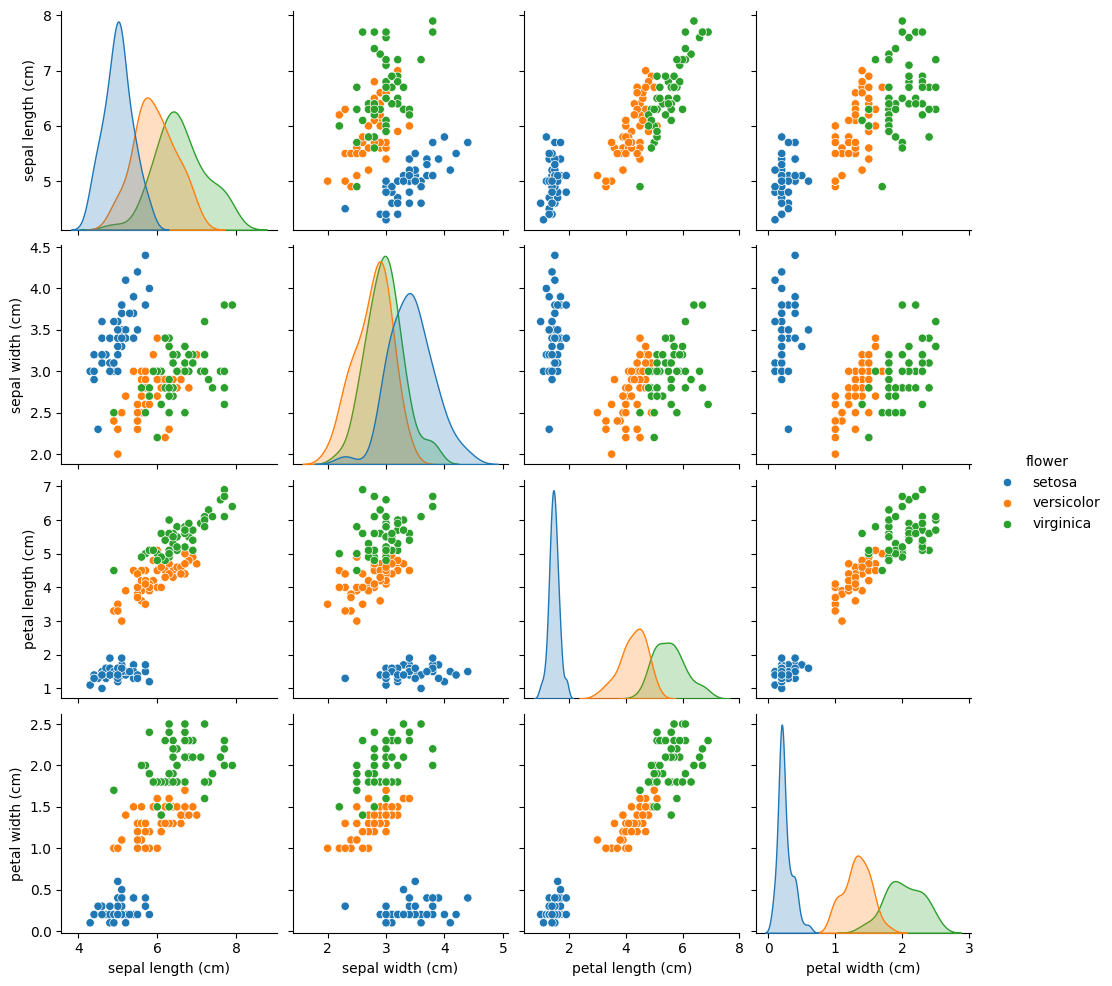

In [12]:
# All at once
sns.pairplot(df, hue="flower")
plt.show()

# Checking Feature Correlation

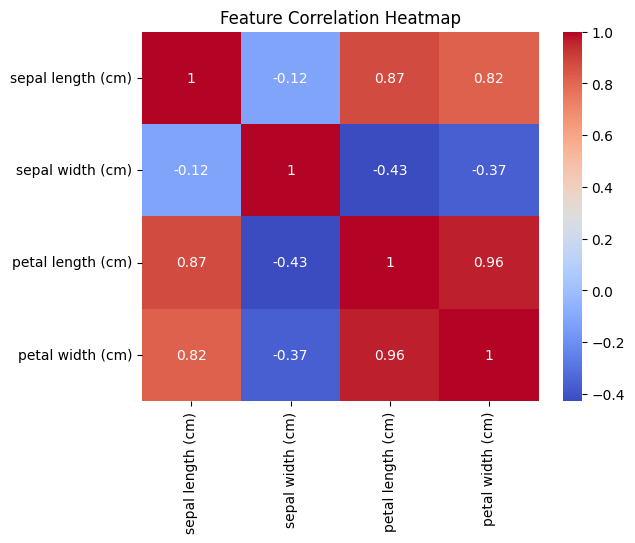

In [13]:
# Remeber to drop the "flower" column when passing to the heatmap as it only takes numeric values
sns.heatmap(df.drop("flower", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Experimenting with creating new features

In [14]:
# Petal area (petal length x petal width)
df["petal area (cm^2)"] = df["petal length (cm)"] * df["petal width (cm)"]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,petal area (cm^2)
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30
4,5.0,3.6,1.4,0.2,setosa,0.28


In [15]:
# Sepal area (sepal length x sepal width)
df["sepal area (cm^2)"] = df["sepal length (cm)"] * df["sepal width (cm)"]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,petal area (cm^2),sepal area (cm^2)
0,5.1,3.5,1.4,0.2,setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,setosa,0.28,18.00


In [16]:
# Organizing the columns so it looks better

# Define the desired column order
desired_column_order = [
    'sepal length (cm)',
    'sepal width (cm)',
    'sepal area (cm^2)',
    'petal length (cm)',
    'petal width (cm)',
    'petal area (cm^2)',
    'flower'
]

# Reindex the DataFrame with the desired column order
df = df[desired_column_order]

# Display the first few rows to show the new column order
df.head()

,sepal length (cm),sepal width (cm),sepal area (cm^2),petal length (cm),petal width (cm),petal area (cm^2),flower
0,5.1,3.5,17.85,1.4,0.2,0.28,setosa
1,4.9,3.0,14.70,1.4,0.2,0.28,setosa
2,4.7,3.2,15.04,1.3,0.2,0.26,setosa
3,4.6,3.1,14.26,1.5,0.2,0.30,setosa
4,5.0,3.6,18.00,1.4,0.2,0.28,setosa


# Visualizing New Features

## Distributions

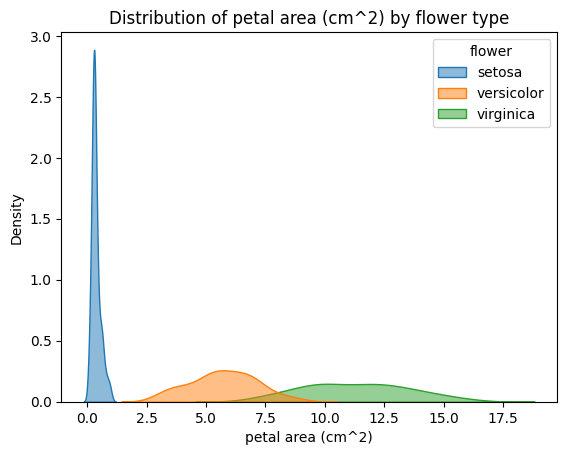

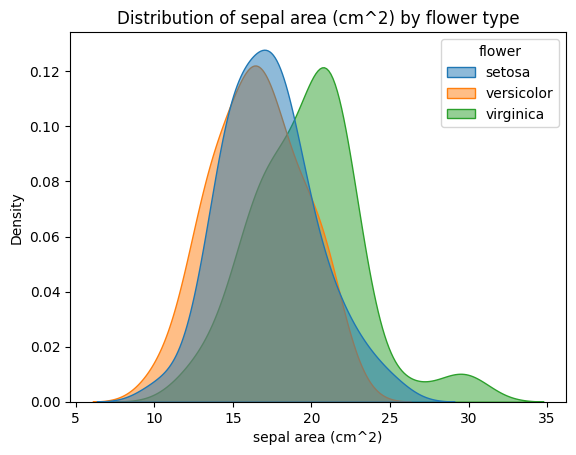

In [17]:
for feature in df[["petal area (cm^2)", "sepal area (cm^2)"]].columns:
  sns.kdeplot(data=df, x=feature, hue="flower", fill=True, common_norm=False, alpha=0.5)
  plt.title(f"Distribution of {feature} by flower type")
  plt.show()

## Scatterplots

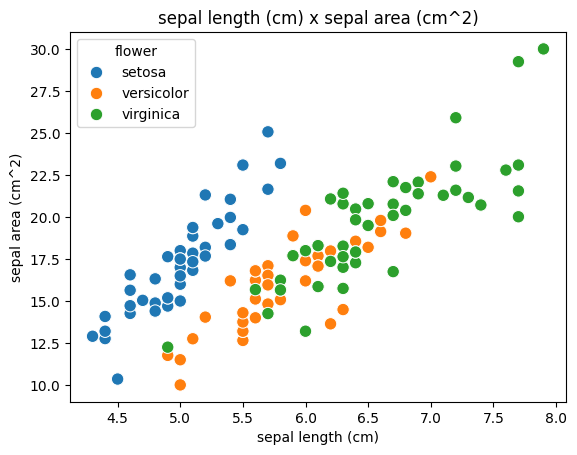

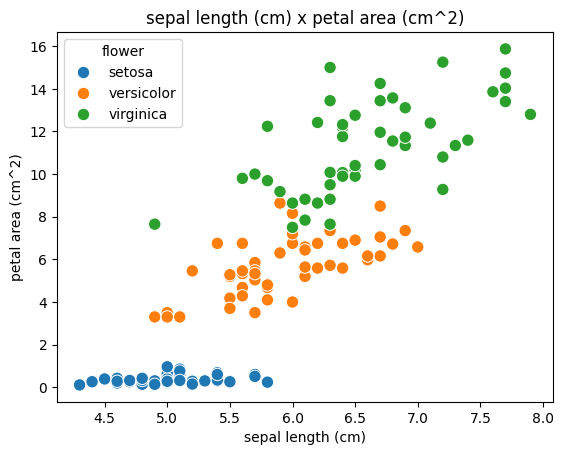

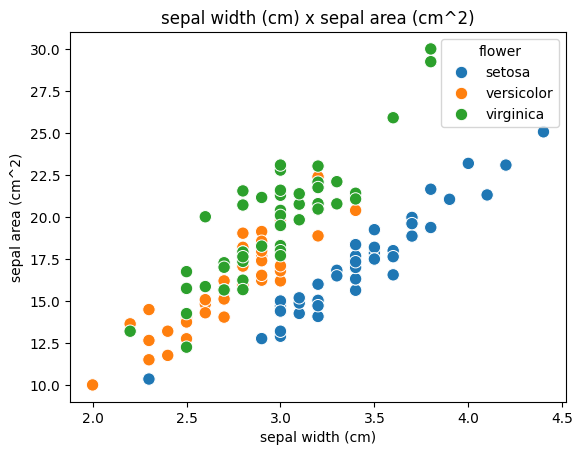

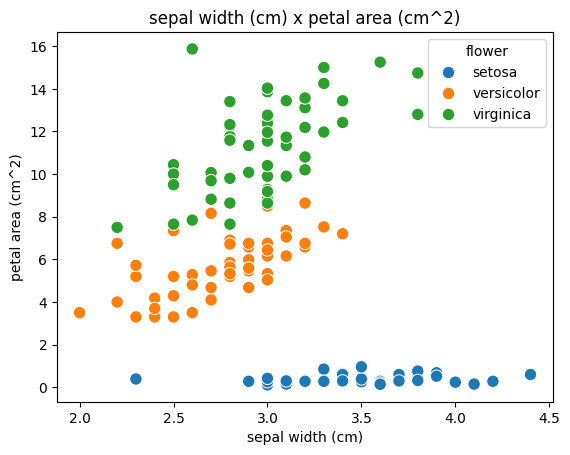

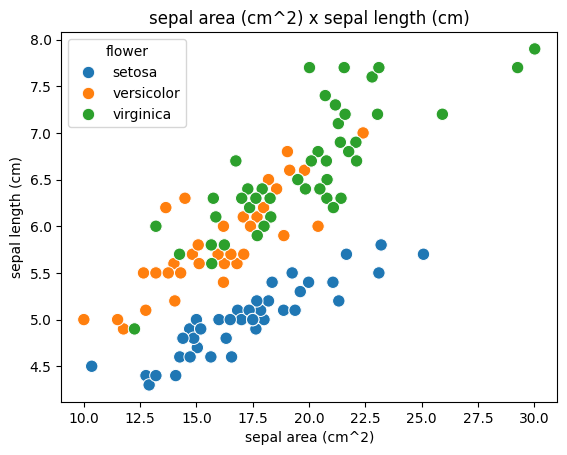

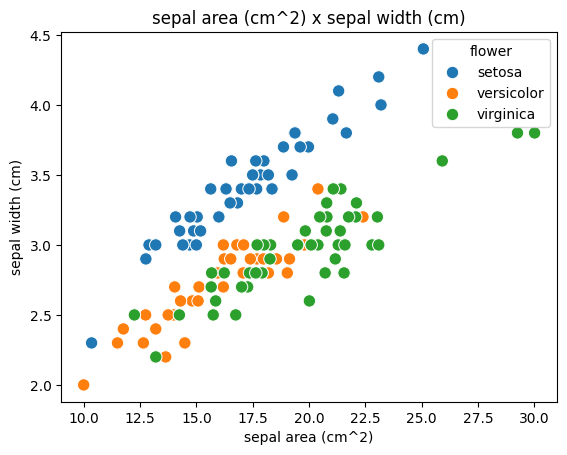

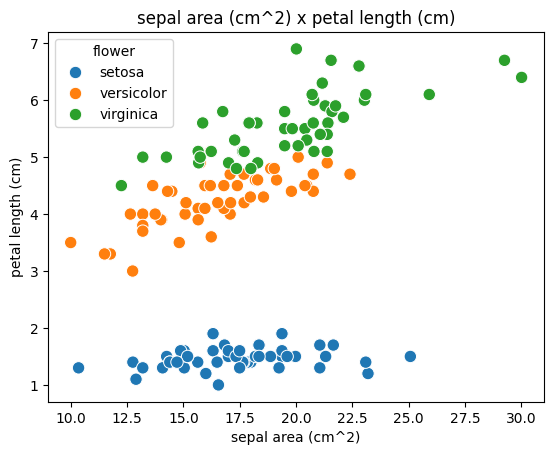

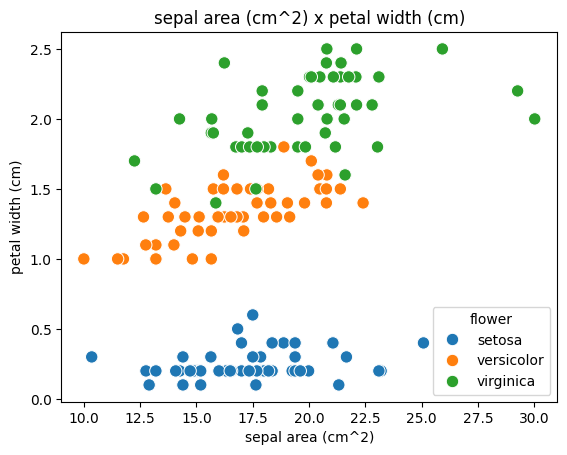

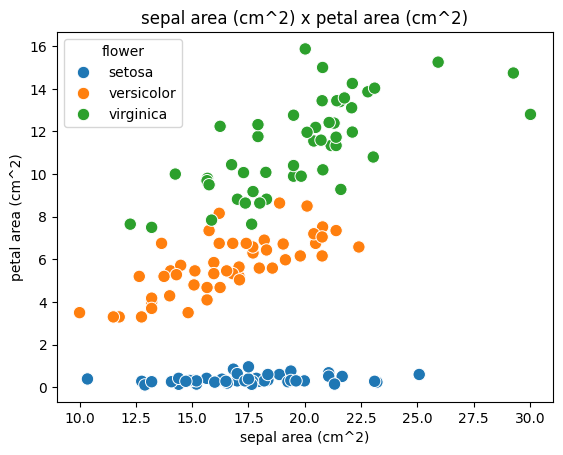

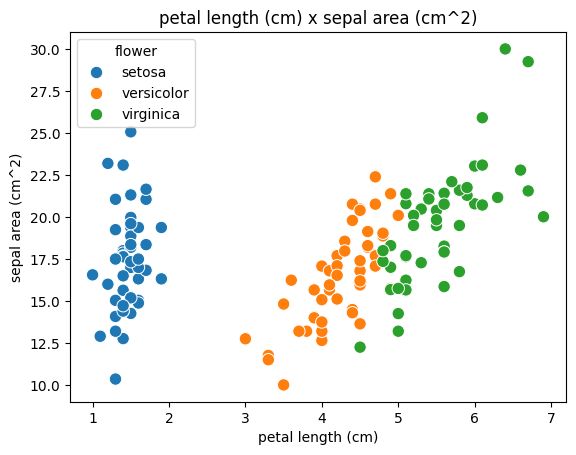

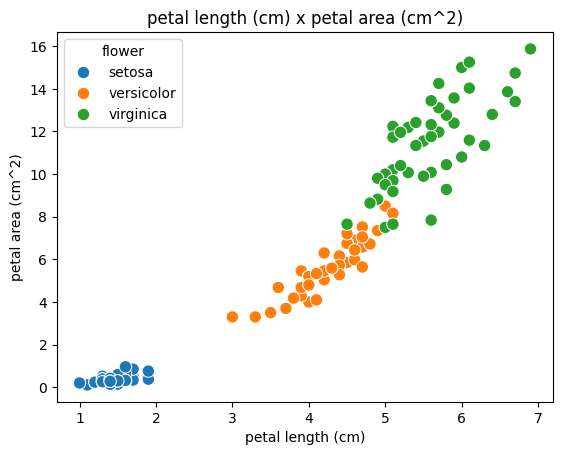

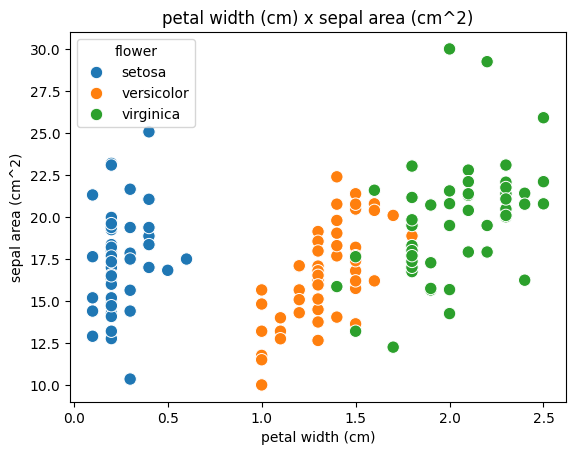

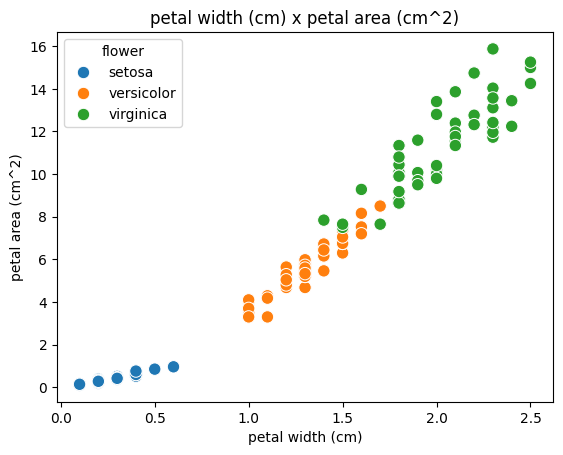

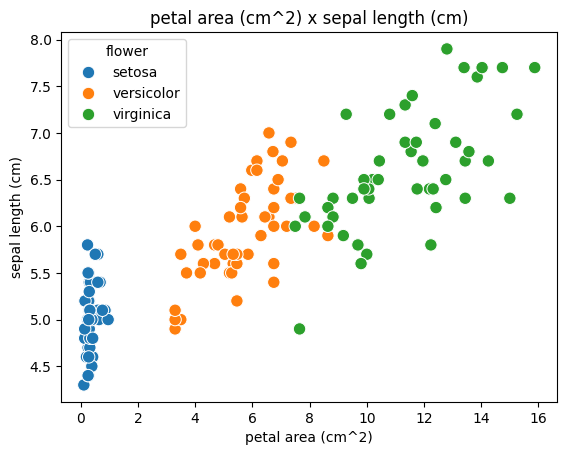

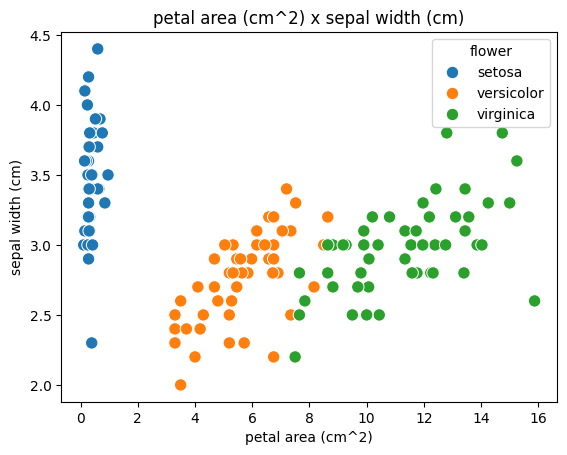

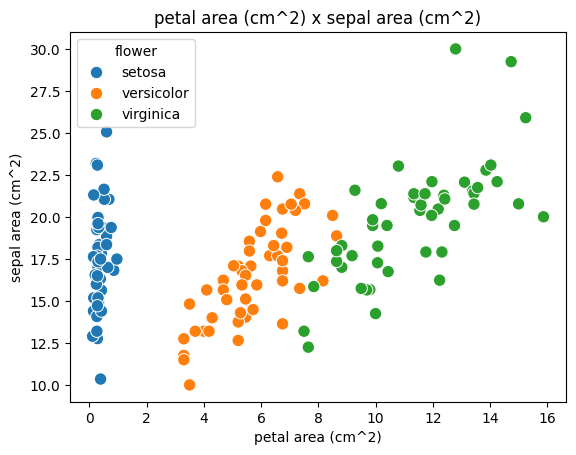

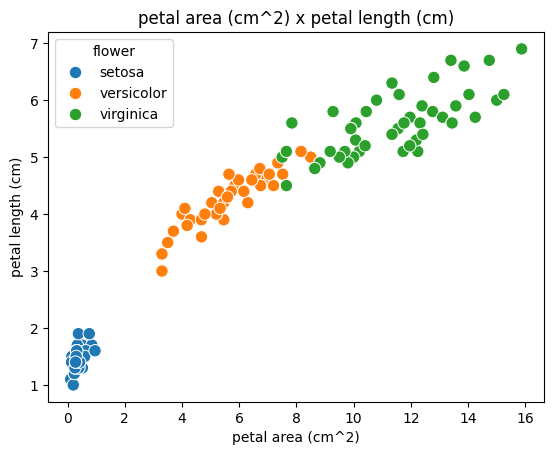

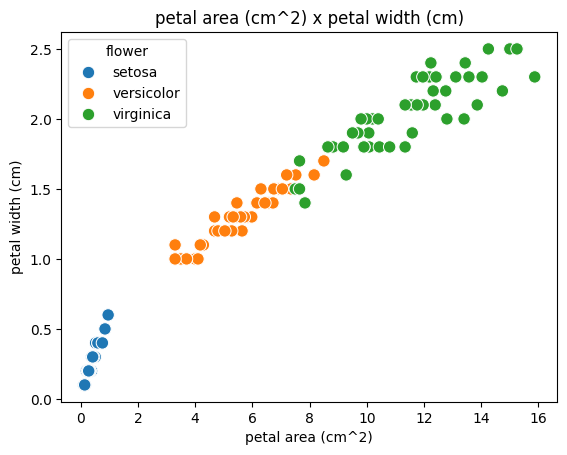

In [18]:
# Plotting the new features against each other feature
new_features = ["petal area (cm^2)", "sepal area (cm^2)"]

for x_feature in df.drop("flower", axis=1).columns:
  for y_feature in df.drop("flower", axis=1).columns:
    if x_feature != y_feature and (x_feature in new_features or y_feature in new_features):
      sns.scatterplot(data=df, x=x_feature, y=y_feature, hue="flower", s=80)
      plt.title(f"{x_feature} x {y_feature}")
      plt.show()

## Pairplot

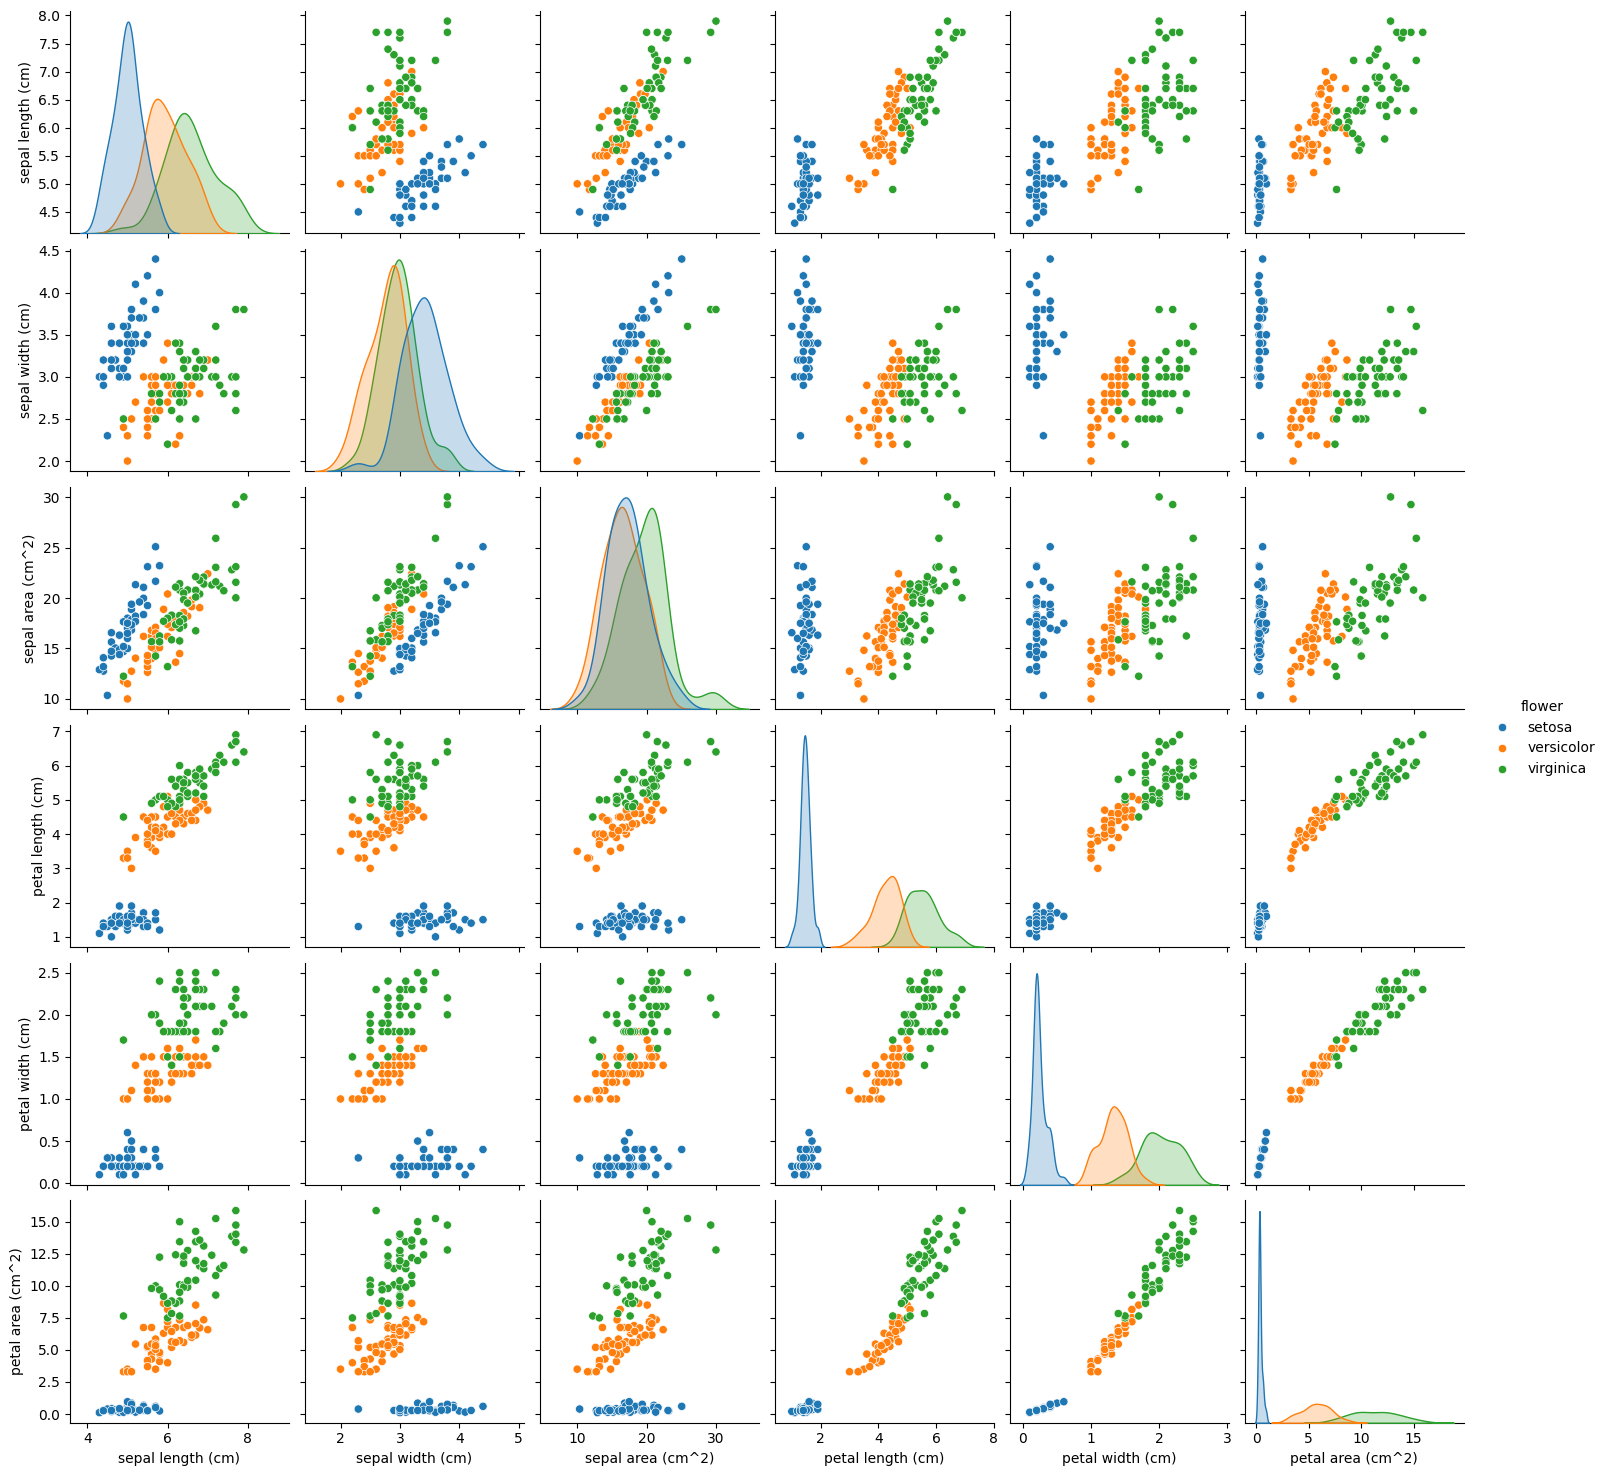

In [19]:
# Visualizing new features distributions and plotted against original features
sns.pairplot(df, hue="flower")
plt.show()

# Checking Correlation of New Features

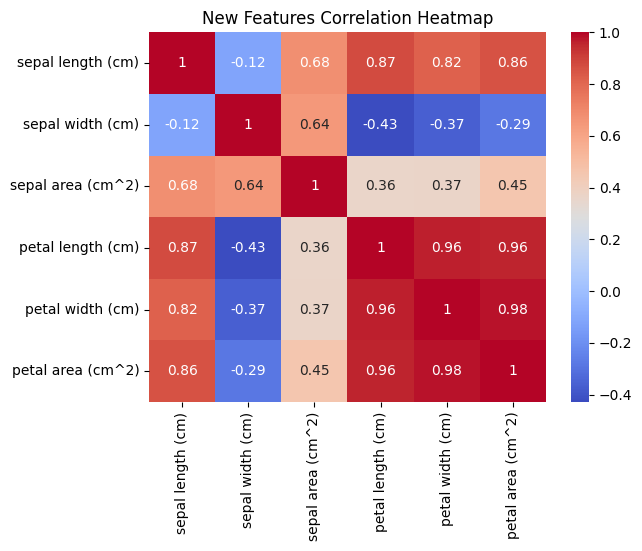

In [20]:
sns.heatmap(df.drop("flower", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("New Features Correlation Heatmap")
plt.show()

# Conclusion

Based on the exploratory data analysis of the Iris dataset, we can draw several conclusions:

1. The petal length (cm) and petal width (cm) features appear to be the most important for distinguishing between the different Iris species. Their distributions show clear separation between the setosa class and the other two classes (versicolor and virginica), and also a notable separation between versicolor and virginica. The visualizations consistently highlight these as the most discriminative features across various plot types.
2. The pair of features that best separates the classes is petal length (cm) and petal width (cm). The scatterplot of these two features shows distinct clusters for each of the three species, with minimal overlap, making them highly effective for classification.
3. The setosa class is the easiest to classify. This is evident in all the visualizations, where the setosa data points are clearly separated from the versicolor and virginica data points, particularly when considering petal measurements.
4. Looking at the correlation heatmap, petal length (cm) and petal width (cm) are the most closely correlated features, showing a strong positive correlation. This suggests that as the petal length increases, the petal width also tends to increase. Similarly, sepal length (cm) and petal length (cm) also show a high positive correlation.
5. The addition of the new features, petal area (cmˆ2) and sepal area (cmˆ2), appears to be a good idea. The distribution plots and scatterplots involving these new features also show good separation between the classes, particularly for the setosa class. The correlation heatmap shows that petal area is highly correlated with petal length and petal width, and sepal area is highly correlated with sepal length and sepal width, which is expected as they are derived from these features. These new features could potentially provide additional discriminatory power for classification models.
6. While setosa is clearly separable, the versicolor and virginica classes show some overlap, particularly in the sepal measurements. This suggests that distinguishing between these two classes might be more challenging for a classification model compared to separating setosa.
7. Observing the distribution plots, most features appear to have unimodal distributions (a distribution that has a single peak), although there are variations in skewness (whether it's skewed to one side or the other compared to a symmetrical distribution) across features and classes.
8. Visual inspection of the scatterplots and distribution plots does not reveal any obvious extreme outliers that would require immediate special handling, but this could be further investigated with specific outlier detection methods if needed for a particular model.

In summary, the EDA reveals that the petal dimensions are the most informative features for classifying Iris species, with the setosa class being easily distinguishable. The strong correlations between related features and the promising separation shown by the engineered features suggest that this dataset is well-suited for classification tasks, although the overlap between versicolor and virginica should be considered.